In [37]:
import sys
import os
import importlib
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [38]:
from src.models.baseModels.resnet_regression import ResNetModel
importlib.reload(sys.modules['src.models.baseModels.resnet_regression'])

data_dir = '../datasets/artificial_data/'
dataset_name = 'SimpleNoisyCircleImageGenerator'

resnet = ResNetModel(
    data_dir=f'{data_dir}{dataset_name}', 
    num_epochs=20,
    learning_rate=0.01,
    weight_decay=1e-4,
    early_stopping_tol=3,
    early_stopping_min_delta=10
)


resnet.load_data()
resnet.train()
resnet.evaluate()

Is cuda available:  True
Epoch 1/20, Train Loss: 706937196543651.0, Val Loss: 1930453266822553.8
Epoch 2/20, Train Loss: 807186695.8441901, Val Loss: 2195549921.794599
Epoch 3/20, Train Loss: 1331191.9977384869, Val Loss: 3701125.5608433313
Epoch 4/20, Train Loss: 1474.273129111842, Val Loss: 3453.297620500837
Epoch 5/20, Train Loss: 1859.4261924342106, Val Loss: 5028.213073730469
Epoch 6/20, Train Loss: 450.6900869670667, Val Loss: 663.6922247750418
Epoch 7/20, Train Loss: 731.0509619461862, Val Loss: 1562.119994027274
Epoch 8/20, Train Loss: 427.5566301847759, Val Loss: 684.7084350585938
Epoch 9/20, Train Loss: 478.7769775390625, Val Loss: 760.2713296072824
Early stopped at epoch: 9
Loss of the network on the test images: 30.1544006892613


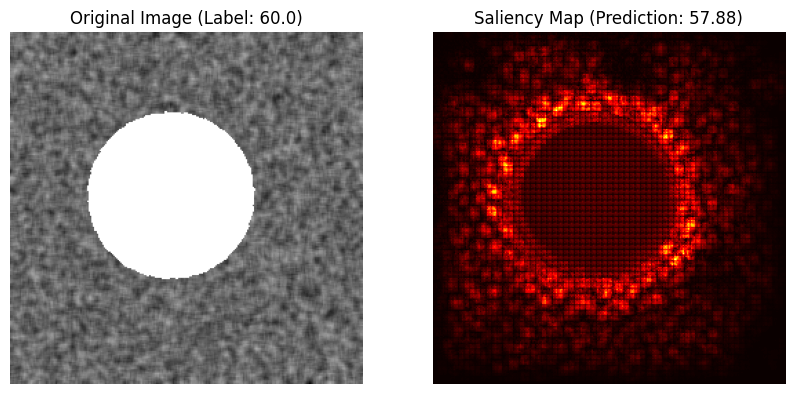

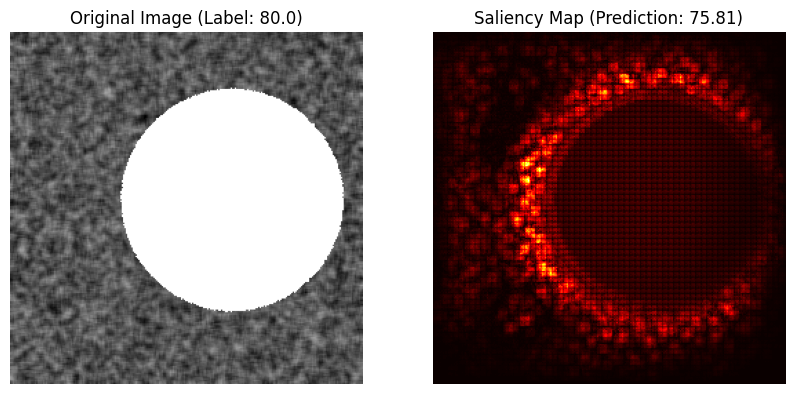

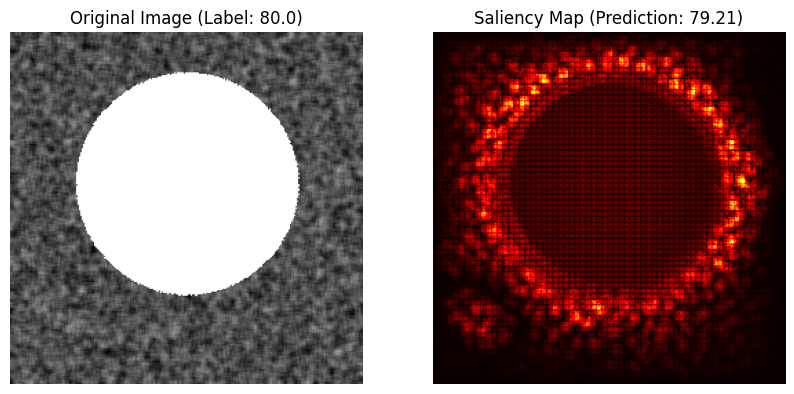

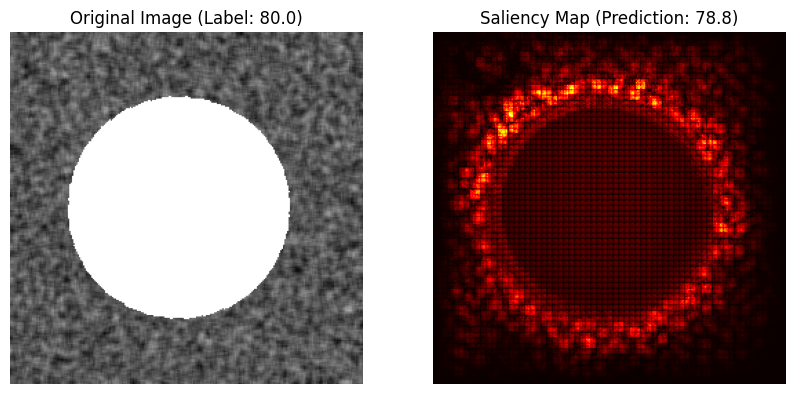

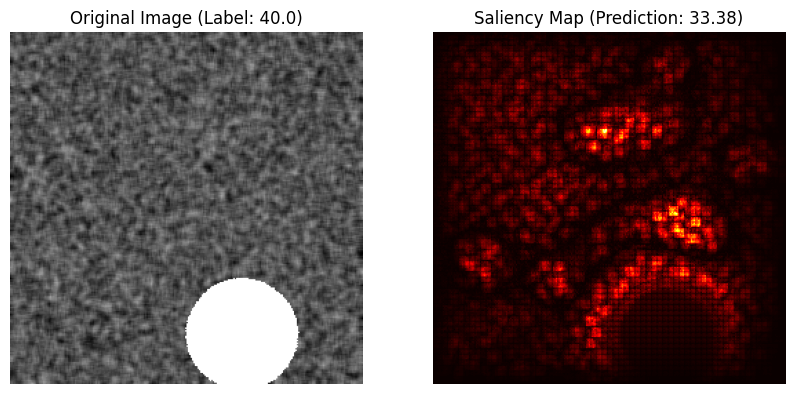

In [39]:
from src.XAI.XAI import XAIResNet
importlib.reload(sys.modules['src.XAI.XAI'])

# Assuming XAIResNet was already imported previously

# Initialize XAI instance
xai_resnet = XAIResNet(modelWrapper=resnet, device=resnet.device)
xai_resnet.get_saliency_maps(image_count=5, save_output=True, save_dir='my_dir')

In [40]:
import sys
import os
import importlib
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)